In [1]:
%load_ext autoreload
%autoreload 2

2022-03-09 14:55:01.268459: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-09 14:55:01.268594: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


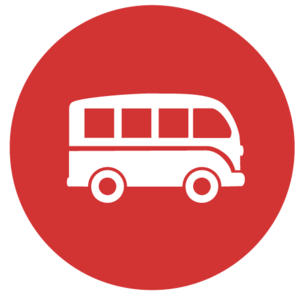

In [2]:
import imageio
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import ipywidgets as widgets
import operator
import functools
import pandas as pd
from IPython import display
from iarchitect.trainer import Trainer
from iarchitect.render import create_list_video,create_list_gif
from iarchitect.common import create_policy_eval_video
from iarchitect.solutions import read_args,make_environment,ValidEnv
from iarchitect.envs import AlignedRowEnv
from tf_agents.environments import tf_py_environment
from tf_agents.environments import utils
from tf_agents.policies.scripted_py_policy import ScriptedPyPolicy
im = Image.open("wagon.png")
im

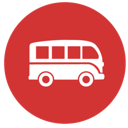

In [3]:
im = im.resize((128,128))
im

In [4]:
im = np.array(im)

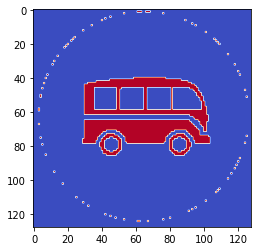

In [5]:
# channel 0 uniquement
target = im[:,:,0].flatten()
# on ne conserve que les couleurs "marquées"
mask = target>=250
target[~mask]=0
target[mask]=1
target = target.reshape(im.shape[:-1])
plt.imshow(target,cmap="coolwarm")

In [6]:
np.unique(target.flatten())

array([0, 1], dtype=uint8)

In [7]:
indices_to_fill = np.argwhere(target.flatten()==1)
np.random.shuffle(indices_to_fill)
nb = indices_to_fill.shape[0]

In [8]:
ims = []

In [9]:
env= AlignedRowEnv(im.shape[0]*im.shape[1],action_float=False,
                             fail_on_same=True,
                             observation_1D = True,
                             rewards = {
                                 "already_filled":-10,
                                 "max_iter":-10,
                                 "new_value":1,
                                 "success":10
                             })
utils.validate_py_environment(env, episodes=5)
tf_env = tf_py_environment.TFPyEnvironment(env)

In [10]:
from iarchitect.render import npemojis,image_from_text
emojis = npemojis(10)
def render_grid(grid):
    texts = [" ".join(emojis[grid[i,:]].flat) for i in range(grid.shape[0])]
    fonts = [40]*len(texts)
    im = image_from_text(texts,fonts)
    return im


In [16]:
compt = 0
compt_pas = 0 
ims = []
env.reset()
n = int(env.dimension**0.5)  
centerx = int((n)/2)
centery = centerx
x,y = 8,8
while compt<nb:
    if compt % 100 == 0 or compt==nb-1:
        print(compt)
        display.clear_output(wait=True)
        grid = env._state.reshape((n,n))
        if compt % 200 == 0: 
            debx=max(0,centerx - (compt_pas+1)*x)
            finx=min(n,centerx + (compt_pas+1)*x)        
            deby=max(0,centery - (compt_pas+1)*y)
            finy=min(n,centery + (compt_pas+1)*y)
            compt_pas += 1
        grid = grid[debx:finx,deby:finy]
        ims.append(render_grid(grid))
        display.display(ims[-1])
        
    ind = indices_to_fill[compt]
    env.step(ind)
    compt+=1

In [20]:
newims = list(map(operator.methodcaller("resize",(752,672),Image.NONE),ims))
# newims = list(map(operator.methodcaller("resize",(752,672),Image.NONE),ims))

In [21]:
create_list_gif(newims,"wagon_carotts",fps=5)

In [22]:
create_list_video(newims,"wagon_carottes",fps=4)

[752 752 752 752 752 752 752 752 752 752 752 752 752 752 752 752 752 752
 752]
[672 672 672 672 672 672 672 672 672 672 672 672 672 672 672 672 672 672
 672]
0 -> wagon_carottes.mp4
(672, 752, 4)
1 -> wagon_carottes.mp4
(672, 752, 4)
2 -> wagon_carottes.mp4
(672, 752, 4)
3 -> wagon_carottes.mp4
(672, 752, 4)
4 -> wagon_carottes.mp4
(672, 752, 4)
5 -> wagon_carottes.mp4
(672, 752, 4)
6 -> wagon_carottes.mp4
(672, 752, 4)
7 -> wagon_carottes.mp4
(672, 752, 4)
8 -> wagon_carottes.mp4
(672, 752, 4)
9 -> wagon_carottes.mp4
(672, 752, 4)
10 -> wagon_carottes.mp4
(672, 752, 4)
11 -> wagon_carottes.mp4
(672, 752, 4)
12 -> wagon_carottes.mp4
(672, 752, 4)
13 -> wagon_carottes.mp4
(672, 752, 4)
14 -> wagon_carottes.mp4
(672, 752, 4)
15 -> wagon_carottes.mp4
(672, 752, 4)
16 -> wagon_carottes.mp4
(672, 752, 4)
17 -> wagon_carottes.mp4
(672, 752, 4)
18 -> wagon_carottes.mp4
(672, 752, 4)


In [8]:
from pathlib import Path
import ipywidgets as widgets
import operator
import pandas as pd
from IPython import display
from iarchitect.trainer import Trainer
from iarchitect.common import create_policy_eval_video
from iarchitect.solutions import read_args,make_environment,ValidEnv
from iarchitect.envs import AlignedRowEnv
from tf_agents.environments import tf_py_environment
from tf_agents.environments import utils
from tf_agents.policies.scripted_py_policy import ScriptedPyPolicy

2022-03-09 11:05:48.305474: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-09 11:05:48.305513: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [9]:
env= AlignedRowEnv(im.shape[0]*im.shape[1],action_float=False,
                             fail_on_same=True,
                             observation_1D = True,
                             rewards = {
                                 "already_filled":-10,
                                 "max_iter":-10,
                                 "new_value":1,
                                 "success":10
                             })
utils.validate_py_environment(env, episodes=5)
tf_env = tf_py_environment.TFPyEnvironment(env)



In [10]:
action_script = []
for i in indices_to_fill:
    action_script.append((1,int(i)))

In [11]:
len(action_script)

1732

In [12]:
wagon_policy = ScriptedPyPolicy(
    time_step_spec=None, action_spec=env.action_spec(), action_script=action_script[:10])
old = wagon_policy.action
def wrapper(ts,*args):
    return old(ts,None,*args)
wagon_policy.action = wrapper
create_policy_eval_video(tf_env,env,wagon_policy,"wagon_carottes",num_episodes=1,fps=30,each_n_action=50)

2022-03-09 11:05:53.299700: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-09 11:05:53.299743: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-09 11:05:53.299763: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ALS-358): /proc/driver/nvidia/version does not exist
2022-03-09 11:05:53.299998: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (546, 468) to (56

(546, 468)


[swscaler @ 0x6754900] Warning: data is not aligned! This can lead to a speed loss


(546, 468)
(546, 468)


In [ ]:
filename = "wagon_carottes"

In [20]:
env.render_image()